In [1]:
import pandas as pd

In [2]:
events = pd.read_csv("events.csv")

In [3]:
events.shape

(941009, 22)

In [4]:
events.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [5]:
events.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [6]:
## Step 2: Column Selection (Keep vs Drop)

In [7]:
columns_to_keep = [
    'id_odsp',
    'event_team',
    'opponent',
    'side',
    'time',
    'event_type',
    'event_type2',
    'player',
    'player2',
    'shot_place',
    'shot_outcome',
    'is_goal',
    'location',
    'bodypart',
    'assist_method',
    'situation'
]
events_selected = events[columns_to_keep]

In [8]:
events_selected.shape
events_selected.head()

,id_odsp,event_team,opponent,side,time,event_type,event_type2,player,player2,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,UFot0hit/,Hamburg SV,Borussia Dortmund,2,2,1,12.0,mladen petric,gokhan tore,6.0,2.0,0,9.0,2.0,1,1.0
1,UFot0hit/,Borussia Dortmund,Hamburg SV,1,4,2,NaN,dennis diekmeier,dennis diekmeier,NaN,NaN,0,NaN,NaN,0,NaN
2,UFot0hit/,Borussia Dortmund,Hamburg SV,1,4,2,NaN,heiko westermann,heiko westermann,NaN,NaN,0,NaN,NaN,0,NaN
3,UFot0hit/,Borussia Dortmund,Hamburg SV,1,7,3,NaN,sven bender,NaN,NaN,NaN,0,NaN,NaN,0,NaN
4,UFot0hit/,Hamburg SV,Borussia Dortmund,2,7,8,NaN,gokhan tore,NaN,NaN,NaN,0,2.0,NaN,0,NaN


In [9]:
events_selected.shape

(941009, 16)

In [10]:
events_selected['time'].head(10)

0     2
1     4
2     4
3     7
4     7
5     9
6    10
7    11
8    11
9    13
Name: time, dtype: int64

In [11]:
events_selected['time'].describe()

count    941009.000000
mean         49.663663
std          26.488977
min           0.000000
25%          27.000000
50%          51.000000
75%          73.000000
max         100.000000
Name: time, dtype: float64

In [12]:
events_selected['minute'] = pd.to_numeric(
    events_selected['time'],
    errors='coerce'
)

/var/folders/26/b93l_w1n7_97bx562hm8fykh0000gn/T/ipykernel_25124/3369711474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_selected['minute'] = pd.to_numeric(


In [13]:
events_selected = events_selected.copy()

In [14]:
events_selected['minute'] = events_selected['time'].astype(int)

In [15]:
events_selected[['time', 'minute']].head()
events_selected['minute'].describe()

count    941009.000000
mean         49.663663
std          26.488977
min           0.000000
25%          27.000000
50%          51.000000
75%          73.000000
max         100.000000
Name: minute, dtype: float64

In [16]:
events_selected = events_selected.drop(columns=['time'])

In [17]:
events_selected.columns

Index(['id_odsp', 'event_team', 'opponent', 'side', 'event_type',
       'event_type2', 'player', 'player2', 'shot_place', 'shot_outcome',
       'is_goal', 'location', 'bodypart', 'assist_method', 'situation',
       'minute'],
      dtype='object')

In [18]:
event_type_map = {
    0: 'Announcement',
    1: 'Attempt',
    2: 'Corner',
    3: 'Foul',
    4: 'Yellow card',
    5: 'Second yellow card',
    6: 'Red card',
    7: 'Substitution',
    8: 'Free kick won',
    9: 'Offside',
    10: 'Hand ball',
    11: 'Penalty conceded'
}

In [19]:
events_selected['event_type_label'] = (
    events_selected['event_type']
    .astype(int)
    .map(event_type_map)
)

In [20]:
events_selected['event_type_label'].isna().sum()

0

In [21]:
events_selected['event_type_label'].value_counts()

event_type_label
Free kick won         237932
Foul                  232925
Attempt               229135
Corner                 91204
Substitution           51738
Offside                43476
Yellow card            39911
Hand ball              10730
Penalty conceded        2706
Red card                1152
Second yellow card       100
Name: count, dtype: int64

In [22]:
events_selected['is_shot'] = events_selected['event_type_label'] == 'Attempt'

In [23]:
events_selected['is_shot'].value_counts()

is_shot
False    711874
True     229135
Name: count, dtype: int64

In [24]:
location_map = {
    1: 'Attacking half',
    2: 'Defensive half',
    3: 'Centre of the box',
    4: 'Left wing',
    5: 'Right wing',
    6: 'Difficult angle and long range',
    7: 'Difficult angle on the left',
    8: 'Difficult angle on the right',
    9: 'Left side of the box',
    10: 'Left side of the six yard box',
    11: 'Right side of the box',
    12: 'Right side of the six yard box',
    13: 'Very close range',
    14: 'Penalty spot',
    15: 'Outside the box',
    16: 'Long range',
    17: 'More than 35 yards',
    18: 'More than 40 yards',
    19: 'Not recorded'
}

In [25]:
events_selected['location_label'] = (
    events_selected['location']
    .astype(float)
    .map(location_map)
)

In [26]:
events_selected['location_label'].isna().sum()
events_selected['location_label'].value_counts()

location_label
Defensive half                    125137
Outside the box                    93667
Centre of the box                  69606
Attacking half                     53964
Left wing                          29669
Right wing                         29159
Left side of the box               19033
Right side of the box              18441
Very close range                    6661
Left side of the six yard box       3492
Right side of the six yard box      3426
Penalty spot                        2596
Difficult angle on the left         2563
Difficult angle on the right        2458
Long range                          1991
More than 35 yards                  1978
Difficult angle and long range      1517
Not recorded                        1453
More than 40 yards                   256
Name: count, dtype: int64

In [27]:
def map_zone(location):
    if location in [
        'Centre of the box',
        'Left side of the box',
        'Right side of the box',
        'Very close range',
        'Penalty spot'
    ]:
        return 'Box'
    
    if location in [
        'Left side of the six yard box',
        'Right side of the six yard box'
    ]:
        return 'Six-yard box'
    
    if location in [
        'Outside the box',
        'Long range',
        'More than 35 yards',
        'More than 40 yards',
        'Difficult angle and long range'
    ]:
        return 'Outside box'
    
    if location in [
        'Left wing',
        'Right wing',
        'Difficult angle on the left',
        'Difficult angle on the right'
    ]:
        return 'Wide areas'
    
    return 'Other'

In [28]:
events_selected['zone_group'] = events_selected['location_label'].apply(map_zone)

In [29]:
events_selected['zone_group'].value_counts()

zone_group
Other           654496
Box             116337
Outside box      99409
Wide areas       63849
Six-yard box      6918
Name: count, dtype: int64

In [30]:
shots_df = events_selected[events_selected['is_shot']].copy()

In [31]:
shots_df.shape

(229135, 20)

In [32]:
shot_outcome_map = {
    1: 'On target',
    2: 'Off target',
    3: 'Blocked',
    4: 'Hit the bar'
}

In [33]:
shots_df['shot_outcome_label'] = (
    shots_df['shot_outcome']
    .astype(float)
    .map(shot_outcome_map)
)

In [34]:
shots_df['shot_outcome_label'].value_counts()
shots_df['shot_outcome_label'].isna().sum()

637

In [35]:
def classify_shot(row):
    if row['is_goal'] == 1:
        return 'Goal'
    if row['shot_outcome_label'] == 'On target':
        return 'On target'
    if row['shot_outcome_label'] == 'Blocked':
        return 'Blocked'
    return 'Off target'

In [36]:
shots_df['shot_result'] = shots_df.apply(classify_shot, axis=1)

In [37]:
shots_df['shot_result'].value_counts()

shot_result
Off target    96414
On target     54198
Blocked       54082
Goal          24441
Name: count, dtype: int64

In [38]:
import numpy as np

def assign_pitch_coords(zone):
    if zone == 'Six-yard box':
        return 102, 34
    if zone == 'Box':
        return 100, np.random.uniform(20, 48)
    if zone == 'Outside box':
        return 88, np.random.uniform(18, 50)
    if zone == 'Wide areas':
        return np.random.uniform(70, 100), np.random.choice([5, 63])
    return np.random.uniform(50, 80), np.random.uniform(10, 58)

In [39]:
shots_df[['x', 'y']] = shots_df['zone_group'].apply(
    lambda z: pd.Series(assign_pitch_coords(z))
)

In [40]:
shots_df[['x', 'y']].describe()

,x,y
count,229135.000000,229135.000000
mean,94.297568,34.002157
std,6.711831,9.487267
min,50.012221,5.000000
25%,88.000000,26.600526
50%,100.000000,34.000000
75%,100.000000,41.404147
max,102.000000,63.000000


In [41]:
shots_df.to_csv("shots_heatmap_ready.csv", index=False)

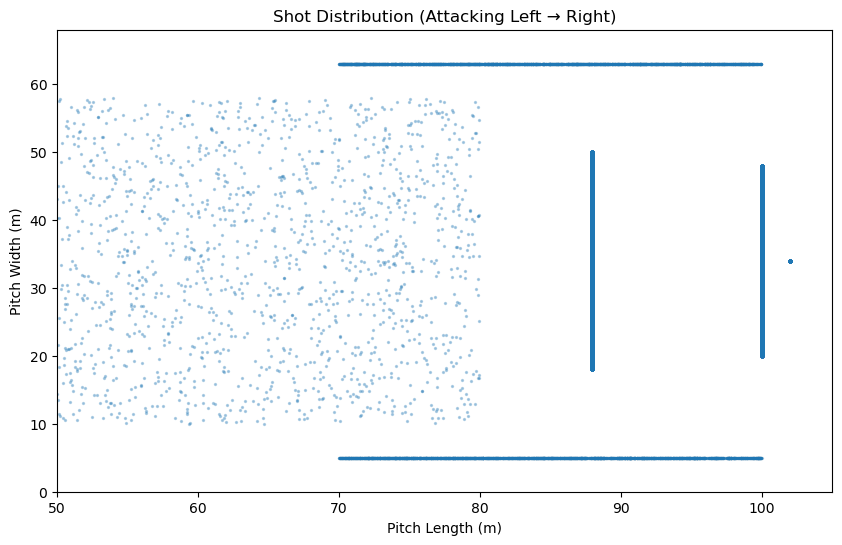

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    shots_df['x'],
    shots_df['y'],
    s=2,
    alpha=0.3
)
plt.xlim(50, 105)
plt.ylim(0, 68)
plt.title("Shot Distribution (Attacking Left → Right)")
plt.xlabel("Pitch Length (m)")
plt.ylabel("Pitch Width (m)")
plt.show()